In [ ]:
!conda install -U conda-forge jupyter-resource-usage
!conda install -y keyring psycopg2 sqlalchemy pandas
!conda install -y pandas
!conda install -y numpy

!conda install -y matplotlib          
!conda install -y seaborn

!conda install -y pyhive

!conda install -y statsmodels
!conda install -y scipy
!conda install -y scikit-learn
!conda install -y pytest

!conda install -y memory_profiler
!conda install -y openpyxl

!conda install presto

!conda install -c conda-forge ipython-autotime

In [1]:
conda list

# packages in environment at /Users/erman.sugecmez/opt/miniconda3:
#
# Name                    Version                   Build  Channel
anyio                     3.5.0            py39hecd8cb5_0  
appnope                   0.1.2           py39hecd8cb5_1001  
argon2-cffi               21.3.0             pyhd3eb1b0_0  
argon2-cffi-bindings      21.2.0           py39hca72f7f_0  
argparse                  1.4.0                    pypi_0    pypi
asttokens                 2.0.5              pyhd3eb1b0_0  
attrs                     22.1.0           py39hecd8cb5_0  
babel                     2.11.0           py39hecd8cb5_0  
backcall                  0.2.0              pyhd3eb1b0_0  
beautifulsoup4            4.12.2           py39hecd8cb5_0  
biopython                 1.80                     pypi_0    pypi
blas                      1.0                         mkl  
bleach                    4.1.0              pyhd3eb1b0_0  
boltons                   23.0.0           py39hecd8cb5_0  
bottleneck


Note: you may need to restart the kernel to use updated packages.


In [2]:
%load_ext autotime

time: 162 µs (started: 2023-11-26 16:21:51 +01:00)


In [3]:
import pandas as pd
from pyhive import presto
import getpass
import psycopg2 as pg
import pandas.io.sql as psql
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf 
from statsmodels.gam.api import GLMGam, BSplines
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols

time: 4.84 s (started: 2023-11-26 16:21:51 +01:00)


In [4]:
pd.set_option('display.max_columns', None)


time: 252 µs (started: 2023-11-26 16:21:55 +01:00)


### load data

In [5]:
## load data
MRRevenue = pd.read_csv('Hiring Staff Data Analyst - Data - MRRevenue_Extract 1.csv')
Partner_Clients = pd.read_csv('Hiring Staff Data Analyst - Data - Partner Clients_Extract 1.csv')
Partners = pd.read_csv('Hiring Staff Data Analyst - Data - Partners_Extract 1.csv')
Partnerships = pd.read_csv('Hiring Staff Data Analyst - Data - Partnerships_Extract 1.csv')
Subscriptions = pd.read_csv('Hiring Staff Data Analyst - Data - Subscription Plans_Extract 1.csv')
Users = pd.read_csv('Hiring Staff Data Analyst - Data - Users_Extract 1.csv')


time: 80 ms (started: 2023-11-26 16:21:55 +01:00)


In [6]:
print(Users.shape)
Users.nunique()

(4709, 19)


user_id                         4709
is_active                          1
user_created_at                 4076
user_updated_at                 4671
user_deleted_at                 1228
company_id                      1651
has_phone                          2
company_country                   13
is_test_account                    2
partner_employee_id             1071
partner_id                       349
partner_employee_created_at      692
partner_employee_updated_at      863
partner_employee_deleted_at        0
is_partner_employee                2
is_partner_admin                   2
is_bookkeeper                      2
n_companies_as_bookkeeper         49
first_accepted_pleo_terms_at    4108
dtype: int64

time: 16.4 ms (started: 2023-11-26 16:21:56 +01:00)


In [7]:
print(Partners.shape)
Partners.nunique()

(426, 20)


partner_id                     426
partner_name                   302
partner_tier                     8
is_overridden                    2
entered_current_tier_at        243
partner_created_at             337
partner_deleted_at              23
address_country_code             8
is_self_sign_up                  2
partner_own_company_id         283
number_of_employees_invited     41
days_to_not_new_partner         38
is_new_partner                   2
mrr_prev_month                 348
mrr_ttm                        386
billed_users_prev_month        163
billed_users_ttm               348
pct_physical_cards_enabled      79
pct_bills_enabled               49
pct_mileage_enabled             40
dtype: int64

time: 5.7 ms (started: 2023-11-26 16:21:56 +01:00)


In [8]:
print(Partner_Clients.shape)
Partner_Clients.nunique()

(1179, 40)


company_id                           1179
company_name                          690
is_partner_client                       2
is_partner_own_company                  2
company_country                        12
has_direct_accounting_integration       2
created_at                           1179
deleted_at                             74
is_self_onboarder                       2
reffering_partner_employee_id         321
mrr_prev_month                        216
user_count                             41
first_presentment_date                494
last_presentment_date                 118
accounting_system_set_up                2
accounting_setup_at                   865
first_cardorder_at                    859
first_walletload_date                 485
first_walletload_eur                  306
first_receipt_uploaded_at             805
first_pocket_expense_at               188
latest_export_date                    140
last_admin_login_at                   806
first_reimbursement_at            

time: 7.34 ms (started: 2023-11-26 16:21:56 +01:00)


In [9]:
print(Partnerships.shape)
Partnerships.nunique()

(1681, 2)


company_id    1179
partner_id     429
dtype: int64

time: 3.3 ms (started: 2023-11-26 16:21:56 +01:00)


In [10]:
print(Subscriptions.shape)
Subscriptions.nunique()

(1681, 3)


company_id      1179
pricing_plan       8
company_name     690
dtype: int64

time: 3.53 ms (started: 2023-11-26 16:21:56 +01:00)


In [11]:
print(MRRevenue.shape)
MRRevenue.nunique()

(9783, 20)


company_id                                 996
month                                       30
billing_subscription_plan_name               9
previous_billing_subscription_plan_name      9
invoice_status                               2
mrr_status                                   9
customer_definition                          4
is_yearly_payment                            2
contract_category                            3
first_paid_non_zero_invoice_date           263
end_mrr_eur                                846
end_billed_users                            85
market                                      10
region                                       5
company_size                                 9
domain                                       2
segment_l1                                   3
segment_l2                                   5
fdd_at                                     995
month_partner_tier                          45
dtype: int64

time: 11 ms (started: 2023-11-26 16:21:56 +01:00)


In [12]:
## 2 duplicates in Partnerships data
Partnerships[Partnerships.duplicated()]

,company_id,partner_id
1109,ab3a82ecb0a20ca62d62b8272560e7cb,7c62f3838c71fba112510a411039e778
1288,39a078074a08c998b1a457a907f1076a,048505bd7194bb7ef1ab6cdb0225df84


time: 8.49 ms (started: 2023-11-26 16:21:56 +01:00)


In [13]:
Partnerships.drop_duplicates()

,company_id,partner_id
0,503002fffd92516aabfde6cf1a535a0c,d1609cbf549eda2da3d322322dd09cbc
1,4e7b4b3d63225cfa1b7fbc1adef45731,bec416c0f7cf98de8e60d55698bde8da
2,74c9f73522ab7c9b46e90a825444c390,f05cac965d0c6379c4c321b53927c5d3
3,1f8f40e5f4d69e9e4a61cf1c3949e776,7dbd443d6e82c360beee66276ab55784
4,c78bff93552f3d534f00139e29b3351d,a2b3626f0329bd897bf555a482511242
...,...,...
1676,f2163eb5cbb969630a782ddb468b5aa0,7f88d0fa50b12a05869a8a842011f8a9
1677,a19db2aae83735dd0b073916bfddf66c,576dc064a3807820ec06f03a4b9c80fd
1678,d8230e7eb19591fed311410a5fffe70c,cce5df29ee479ee4ca330f86512dbd36
1679,911d5f18c554583a2258cb0993bad4cb,563b6bea694e795148cb4b76bec089a7


time: 5.74 ms (started: 2023-11-26 16:21:56 +01:00)


In [14]:
Partnerships.drop_duplicates().nunique()

company_id    1179
partner_id     429
dtype: int64

time: 3.55 ms (started: 2023-11-26 16:21:56 +01:00)


#### 464 client has multiple partners
#### I tried to find if there's any hint to find the client's partner, but no table allows that.

In [15]:

df = Partnerships.drop_duplicates().groupby('company_id')['partner_id'].nunique().reset_index().rename(columns = {'partner_id': 'partner_count'})

df[df['partner_count']>1]


,company_id,partner_count
1,006c7ea448a171f3d7e58dc2c8e1d6a9,2
5,0111e5a6b25c1ee4c5c132de9899bba7,2
6,011370bbbb65dd7375b7ec65dfe066fa,2
16,0249b2dbf357907bd1f7ef748801c3d6,2
18,02a114e4eaaf0b7f753421e40652e7f4,2
...,...,...
1163,fdf2aaf0c067954d8cb0cf4ba333a9e3,2
1167,fe846fc7b2382045d0283e8b553aac3f,2
1173,ff05bdefa2c388867e0d66fc5f43eaa5,3
1174,ff701b4e2ccd84ab316a26295aafbffb,2


time: 10.4 ms (started: 2023-11-26 16:21:56 +01:00)


In [16]:
Partnerships.drop_duplicates().groupby('company_id')['partner_id'].nunique().reset_index()

,company_id,partner_id
0,002a59232f11a5ad9cf241d47900dfa5,1
1,006c7ea448a171f3d7e58dc2c8e1d6a9,2
2,009f04f2ffb9b0ae09738317922b954b,1
3,00b7aeeab4b7659262d6fa40e1dd7da3,1
4,00e4249c408ff433ef74dfc3638b96d4,1
...,...,...
1174,ff701b4e2ccd84ab316a26295aafbffb,2
1175,ff8758e53ad80705f0f3964d4daabe74,2
1176,ff88f862a96c2207ecd14b99eabaabb4,1
1177,ffbfb529238a4bd2df513f84247ff989,1


time: 7.97 ms (started: 2023-11-26 16:21:56 +01:00)


In [17]:
df[df['partner_count']>1]['partner_count'].describe()

count    464.000000
mean       2.077586
std        0.275755
min        2.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: partner_count, dtype: float64

time: 6.32 ms (started: 2023-11-26 16:21:56 +01:00)


In [18]:
## I'll try to see if there's a connection between clients assigned to 2 partners vs client's that are self onboarder
pd.merge(df[df['partner_count']>1],
         Partner_Clients[['company_id', 'is_self_onboarder', 'reffering_partner_employee_id']],
         how = 'left',
         on = 'company_id')
         
         
         

,company_id,partner_count,is_self_onboarder,reffering_partner_employee_id
0,006c7ea448a171f3d7e58dc2c8e1d6a9,2,True,NaN
1,0111e5a6b25c1ee4c5c132de9899bba7,2,True,NaN
2,011370bbbb65dd7375b7ec65dfe066fa,2,False,NaN
3,0249b2dbf357907bd1f7ef748801c3d6,2,False,b77eb011-4e84-5b8f-80fd-59fca2b52aca
4,02a114e4eaaf0b7f753421e40652e7f4,2,True,NaN
...,...,...,...,...
459,fdf2aaf0c067954d8cb0cf4ba333a9e3,2,False,NaN
460,fe846fc7b2382045d0283e8b553aac3f,2,True,NaN
461,ff05bdefa2c388867e0d66fc5f43eaa5,3,False,NaN
462,ff701b4e2ccd84ab316a26295aafbffb,2,False,b77eb011-4e84-5b8f-80fd-59fca2b52aca


time: 13.2 ms (started: 2023-11-26 16:21:56 +01:00)


In [19]:
pd.merge(df[df['partner_count']>1],
         Partner_Clients[['company_id', 'is_self_onboarder', 'reffering_partner_employee_id']],
         how = 'left',
         on = 'company_id')['is_self_onboarder'].value_counts()


False    363
True      96
Name: is_self_onboarder, dtype: int64

time: 6.72 ms (started: 2023-11-26 16:21:56 +01:00)


In [20]:
pd.merge(df[df['partner_count']==1],
         Partner_Clients[['company_id', 'is_self_onboarder', 'reffering_partner_employee_id']],
         how = 'left',
         on = 'company_id')['is_self_onboarder'].value_counts()

False    612
True     103
Name: is_self_onboarder, dtype: int64

time: 6.16 ms (started: 2023-11-26 16:21:56 +01:00)


In [21]:
### join Partner Clients with clients who has only 1 partner assigned
Partner_Clients_2 = pd.merge(Partner_Clients,
                         pd.merge(df[df['partner_count']==1], Partnerships.drop_duplicates(), 
                         how = 'left', on ='company_id').drop(columns = {'partner_count'}),
         how = 'left', on = 'company_id')

Partner_Clients_2

,company_id,company_name,is_partner_client,is_partner_own_company,company_country,has_direct_accounting_integration,created_at,deleted_at,is_self_onboarder,reffering_partner_employee_id,mrr_prev_month,user_count,first_presentment_date,last_presentment_date,accounting_system_set_up,accounting_setup_at,first_cardorder_at,first_walletload_date,first_walletload_eur,first_receipt_uploaded_at,first_pocket_expense_at,latest_export_date,last_admin_login_at,first_reimbursement_at,n_physical_cards_enabled,n_virtual_cards_enabled,n_atm_exp,n_in_store_exp,n_online_exp,n_out_of_pocket_expenses,n_empowered_employees,has_pocket_enabled,has_repay_enabled,has_auto_topup_enabled,has_reimbursement_enabled,has_bills_enabled,receipt_percentage_all_time,receipt_percentage_last_30_days,count_of_expenses_all_time,total_number_of_employees,partner_id
0,d1c71fc1c6c2b34760b496cad8de672f,d,True,False,GB,False,1/21/2020 13:09:54,NaN,False,NaN,24.7,7,2/18/2020,10/26/2023,True,1/27/2020 15:36:29,1/31/2020 7:52:50,1/31/2020,2375.0,2/17/2020 15:01:14,NaN,10/5/2023,10/27/2023 7:41:38,NaN,0.0,7.0,0.0,89.0,1002.0,0.0,7.0,False,False,False,False,True,99.13%,81.48%,1145.0,2-4,NaN
1,99e09fee32404327bba5cf3bd1b5ef86,ervice_gmb,True,False,DE,True,6/7/2023 9:42:51,NaN,True,NaN,1326.6,112,8/13/2023,10/27/2023,True,7/18/2023 11:27:55,7/27/2023 4:28:50,7/28/2023,1350.0,8/4/2023 15:39:54,8/4/2023 15:39:49,10/24/2023,10/27/2023 8:11:33,8/8/2023,96.0,94.0,0.0,859.0,58.0,82.0,100.0,True,True,False,True,False,93.96%,95.36%,1093.0,100-199,2fdafc68734f3a93c35267c41b90d00c
2,21faf2cb874804aa964f03bbc304ab81,od_lab_aps,True,False,DK,True,9/13/2023 11:43:00,NaN,True,NaN,0.0,2,9/16/2023,10/25/2023,True,10/10/2023 22:34:59,10/10/2023 22:34:23,9/14/2023,670.0,9/15/2023 10:47:59,NaN,NaN,10/13/2023 8:29:42,NaN,1.0,1.0,0.0,59.0,30.0,0.0,1.0,True,False,False,False,False,12.22%,1.41%,90.0,1,d90d2f1becec943598b489bb35045cd8
3,4e3f320ee10c195d9f9ca18cc9bfd410,g_aps,True,False,DK,True,9/6/2023 14:42:30,NaN,False,d03022b3-ab59-563f-abda-d3b244c77d9b,0.0,1,9/30/2023,10/25/2023,True,9/7/2023 13:25:03,NaN,9/26/2023,3351.0,9/29/2023 15:01:43,NaN,10/27/2023,10/11/2023 15:15:39,NaN,0.0,1.0,0.0,5.0,0.0,0.0,1.0,False,False,False,False,False,100.0%,100.0%,5.0,1,1213b7afb97428a79662d0dd795bdd6c
4,915216ec45816fa7bb46c596f5d75b75,dlab_aps,True,False,DK,True,5/31/2023 12:47:38,NaN,False,783e6e9c-1e34-5237-b234-1849118dc38a,0.0,2,6/16/2023,10/26/2023,True,5/31/2023 12:58:28,6/5/2023 14:28:07,6/7/2023,134.0,7/8/2023 11:54:58,NaN,10/16/2023,10/11/2023 5:04:05,NaN,0.0,2.0,0.0,13.0,52.0,0.0,2.0,False,False,True,False,False,87.88%,83.33%,66.0,2-4,05fb1fd092b67ed483a18c84e227918d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174,4306056146f73e6e2e9a70e9f1da34ae,tive_studi,True,False,DK,True,7/19/2018 7:48:33,NaN,False,NaN,63.9,6,7/29/2019,10/27/2023,True,8/13/2018 10:16:28,7/26/2018 10:52:20,7/31/2018,671.0,7/30/2019 14:42:46,NaN,9/26/2023,10/27/2023 11:14:05,NaN,6.0,2.0,4.0,2087.0,1909.0,0.0,6.0,False,False,True,False,False,85.84%,76.58%,4173.0,2-4,NaN
1175,e1379c82820415264b7cc98541b4886b,ergade_aps,True,False,DK,False,1/22/2019 17:37:34,NaN,False,NaN,47.0,4,2/14/2019,10/23/2023,True,NaN,2/1/2019 8:56:58,2/4/2019,670.0,2/12/2019 21:36:00,NaN,9/14/2022,9/26/2023 12:02:19,NaN,3.0,4.0,0.0,779.0,1712.0,0.0,4.0,False,False,True,False,False,99.69%,85.71%,2617.0,10-49,NaN
1176,7363009c492ca5f7595059355dd113b4,e_aps,True,False,DK,True,6/8/2023 9:20:18,NaN,True,NaN,53.7,3,8/2/2023,10/26/2023,True,7/5/2023 8:17:08,6/8/2023 10:46:31,7/5/2023,4027.0,7/26/2023 11:08:08,NaN,10/17/2023,10/10/2023 12:05:44,NaN,2.0,2.0,0.0,17.0,73.0,0.0,2.0,True,False,False,False,False,92.93%,85.37%,99.0,2-4,cf3c0d5af3755c824c21a70a8e5ac6ca
1177,e8fa2a3c67fc3696079169932e691cd5,ål_og_fjer,True,False,DK,True,7/5/2023 14:30:43,NaN,False,79fd4942-8cb2-562d-adb1-359afe6ffec5,48.3,3,7/25/2023,10/27/2023,True,7/13/2023 12:57:28

time: 31.3 ms (started: 2023-11-26 16:21:56 +01:00)


In [22]:
##join above dataframe with Subscriptions
Partner_Clients_3 = pd.merge(Partner_Clients_2, Subscriptions[['company_id', 'pricing_plan']].drop_duplicates(),
         how = 'left', on = 'company_id')

cols = Partner_Clients_3.columns.tolist()

# Move the last two columns to the second and third positions
cols = [cols[0]] + cols[-2:] + cols[1:-2]

Partner_Clients_3 = Partner_Clients_3[cols]

Partner_Clients_3

,company_id,partner_id,pricing_plan,company_name,is_partner_client,is_partner_own_company,company_country,has_direct_accounting_integration,created_at,deleted_at,is_self_onboarder,reffering_partner_employee_id,mrr_prev_month,user_count,first_presentment_date,last_presentment_date,accounting_system_set_up,accounting_setup_at,first_cardorder_at,first_walletload_date,first_walletload_eur,first_receipt_uploaded_at,first_pocket_expense_at,latest_export_date,last_admin_login_at,first_reimbursement_at,n_physical_cards_enabled,n_virtual_cards_enabled,n_atm_exp,n_in_store_exp,n_online_exp,n_out_of_pocket_expenses,n_empowered_employees,has_pocket_enabled,has_repay_enabled,has_auto_topup_enabled,has_reimbursement_enabled,has_bills_enabled,receipt_percentage_all_time,receipt_percentage_last_30_days,count_of_expenses_all_time,total_number_of_employees
0,d1c71fc1c6c2b34760b496cad8de672f,NaN,PARTNERSHIP,d,True,False,GB,False,1/21/2020 13:09:54,NaN,False,NaN,24.7,7,2/18/2020,10/26/2023,True,1/27/2020 15:36:29,1/31/2020 7:52:50,1/31/2020,2375.0,2/17/2020 15:01:14,NaN,10/5/2023,10/27/2023 7:41:38,NaN,0.0,7.0,0.0,89.0,1002.0,0.0,7.0,False,False,False,False,True,99.13%,81.48%,1145.0,2-4
1,99e09fee32404327bba5cf3bd1b5ef86,2fdafc68734f3a93c35267c41b90d00c,ADVANCED,ervice_gmb,True,False,DE,True,6/7/2023 9:42:51,NaN,True,NaN,1326.6,112,8/13/2023,10/27/2023,True,7/18/2023 11:27:55,7/27/2023 4:28:50,7/28/2023,1350.0,8/4/2023 15:39:54,8/4/2023 15:39:49,10/24/2023,10/27/2023 8:11:33,8/8/2023,96.0,94.0,0.0,859.0,58.0,82.0,100.0,True,True,False,True,False,93.96%,95.36%,1093.0,100-199
2,21faf2cb874804aa964f03bbc304ab81,d90d2f1becec943598b489bb35045cd8,ESSENTIAL,od_lab_aps,True,False,DK,True,9/13/2023 11:43:00,NaN,True,NaN,0.0,2,9/16/2023,10/25/2023,True,10/10/2023 22:34:59,10/10/2023 22:34:23,9/14/2023,670.0,9/15/2023 10:47:59,NaN,NaN,10/13/2023 8:29:42,NaN,1.0,1.0,0.0,59.0,30.0,0.0,1.0,True,False,False,False,False,12.22%,1.41%,90.0,1
3,4e3f320ee10c195d9f9ca18cc9bfd410,1213b7afb97428a79662d0dd795bdd6c,STARTER,g_aps,True,False,DK,True,9/6/2023 14:42:30,NaN,False,d03022b3-ab59-563f-abda-d3b244c77d9b,0.0,1,9/30/2023,10/25/2023,True,9/7/2023 13:25:03,NaN,9/26/2023,3351.0,9/29/2023 15:01:43,NaN,10/27/2023,10/11/2023 15:15:39,NaN,0.0,1.0,0.0,5.0,0.0,0.0,1.0,False,False,False,False,False,100.0%,100.0%,5.0,1
4,915216ec45816fa7bb46c596f5d75b75,05fb1fd092b67ed483a18c84e227918d,STARTER,dlab_aps,True,False,DK,True,5/31/2023 12:47:38,NaN,False,783e6e9c-1e34-5237-b234-1849118dc38a,0.0,2,6/16/2023,10/26/2023,True,5/31/2023 12:58:28,6/5/2023 14:28:07,6/7/2023,134.0,7/8/2023 11:54:58,NaN,10/16/2023,10/11/2023 5:04:05,NaN,0.0,2.0,0.0,13.0,52.0,0.0,2.0,False,False,True,False,False,87.88%,83.33%,66.0,2-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,4306056146f73e6e2e9a70e9f1da34ae,NaN,ESSENTIAL,tive_studi,True,False,DK,True,7/19/2018 7:48:33,NaN,False,NaN,63.9,6,7/29/2019,10/27/2023,True,8/13/2018 10:16:28,7/26/2018 10:52:20,7/31/2018,671.0,7/30/2019 14:42:46,NaN,9/26/2023,10/27/2023 11:14:05,NaN,6.0,2.0,4.0,2087.0,1909.0,0.0,6.0,False,False,True,False,False,85.84%,76.58%,4173.0,2-4
1179,e1379c82820415264b7cc98541b4886b,NaN,ESSENTIAL,ergade_aps,True,False,DK,False,1/22/2019 17:37:34,NaN,False,NaN,47.0,4,2/14/2019,10/23/2023,True,NaN,2/1/2019 8:56:58,2/4/2019,670.0,2/12/2019 21:36:00,NaN,9/14/2022,9/26/2023 12:02:19,NaN,3.0,4.0,0.0,779.0,1712.0,0.0,4.0,False,False,True,False,False,99.69%,85.71%,2617.0,10-49
1180,7363009c492ca5f7595059355dd113b4,cf3c0d5af3755c824c21a70a8e5ac6ca,ESSENTIAL,e_aps,True,False,DK,True,6/8/2023 9:20:18,NaN,True,NaN,53.7,3,8/2/2023,10/26/2023,True,7/5/2023 8:17:08,6/8/2023 10:46:31,7/5/2023,4027.0,7/26/2023 11:08:08,NaN,10/17/2023,10/10/2023 12:05:44,NaN,2.0,2.0,0.0,17.0,73.0,0.0,2.0,True,False,False,False,False,92.93%,85.37%,99.0,2-4
1181,e8fa2a3c67fc3696079169932e691cd5,e2bbc117fe95454e9aba4806fc7f6bc9,ESSENTIAL,ål_og_fje

time: 30.7 ms (started: 2023-11-26 16:21:56 +01:00)


In [23]:
## there are 4 duplicates
Partner_Clients_3[Partner_Clients_3['company_id'].duplicated()]

,company_id,partner_id,pricing_plan,company_name,is_partner_client,is_partner_own_company,company_country,has_direct_accounting_integration,created_at,deleted_at,is_self_onboarder,reffering_partner_employee_id,mrr_prev_month,user_count,first_presentment_date,last_presentment_date,accounting_system_set_up,accounting_setup_at,first_cardorder_at,first_walletload_date,first_walletload_eur,first_receipt_uploaded_at,first_pocket_expense_at,latest_export_date,last_admin_login_at,first_reimbursement_at,n_physical_cards_enabled,n_virtual_cards_enabled,n_atm_exp,n_in_store_exp,n_online_exp,n_out_of_pocket_expenses,n_empowered_employees,has_pocket_enabled,has_repay_enabled,has_auto_topup_enabled,has_reimbursement_enabled,has_bills_enabled,receipt_percentage_all_time,receipt_percentage_last_30_days,count_of_expenses_all_time,total_number_of_employees
136,545816e8fd173054d5ee171e654831d4,NaN,ESSENTIAL,_münchen_g,True,False,DE,True,4/29/2021 14:41:40,NaN,False,NaN,0.0,2,2/22/2022,9/25/2023,True,3/10/2022 15:53:09,NaN,2/8/2022,1000.0,2/23/2022 9:30:30,NaN,7/2/2023,7/3/2023 11:02:15,NaN,0.0,1.0,0.0,0.0,29.0,0.0,1.0,False,False,True,False,True,96.97%,NaN,33.0,5-9
325,ab3a82ecb0a20ca62d62b8272560e7cb,7c62f3838c71fba112510a411039e778,ESSENTIAL,lting_gmbh,False,True,DE,True,9/14/2021 11:42:07,NaN,False,NaN,0.0,8,10/1/2021,10/27/2023,True,9/26/2021 6:02:04,11/12/2021 17:49:05,9/27/2021,500.0,10/1/2021 4:26:28,7/24/2022 15:53:32,10/13/2023,10/13/2023 5:51:33,7/24/2022,6.0,6.0,0.0,225.0,302.0,68.0,7.0,True,True,True,True,True,90.81%,80.7%,664.0,5-9
541,5f66328ec29246ca019f41633cd2256d,NaN,ESSENTIAL,ben_gmbh_s,False,True,DE,True,5/23/2020 10:25:44,NaN,False,NaN,45.0,3,10/26/2020,10/27/2023,True,5/23/2020 10:43:51,7/1/2021 9:21:48,5/27/2020,250.0,10/23/2020 16:54:08,NaN,7/2/2021,3/29/2022 12:19:00,NaN,1.0,3.0,0.0,354.0,0.0,0.0,3.0,False,False,False,False,True,90.73%,10.0%,356.0,5-9
809,39a078074a08c998b1a457a907f1076a,048505bd7194bb7ef1ab6cdb0225df84,STARTER,"liev,_sell",False,True,DE,True,5/3/2022 10:25:37,NaN,False,NaN,0.0,3,7/1/2022,10/27/2023,True,9/13/2022 10:52:16,6/15/2022 6:29:31,6/15/2022,100.0,6/30/2022 11:02:17,NaN,10/26/2023,9/19/2023 15:04:50,NaN,2.0,1.0,0.0,72.0,11.0,0.0,1.0,False,False,True,False,True,98.8%,85.71%,83.0,10-49


time: 19.7 ms (started: 2023-11-26 16:21:56 +01:00)


In [24]:
## remove those duplicates and keep one of them for simplicity
Partner_Clients_3 = Partner_Clients_3.drop_duplicates('company_id')
Partner_Clients_3

,company_id,partner_id,pricing_plan,company_name,is_partner_client,is_partner_own_company,company_country,has_direct_accounting_integration,created_at,deleted_at,is_self_onboarder,reffering_partner_employee_id,mrr_prev_month,user_count,first_presentment_date,last_presentment_date,accounting_system_set_up,accounting_setup_at,first_cardorder_at,first_walletload_date,first_walletload_eur,first_receipt_uploaded_at,first_pocket_expense_at,latest_export_date,last_admin_login_at,first_reimbursement_at,n_physical_cards_enabled,n_virtual_cards_enabled,n_atm_exp,n_in_store_exp,n_online_exp,n_out_of_pocket_expenses,n_empowered_employees,has_pocket_enabled,has_repay_enabled,has_auto_topup_enabled,has_reimbursement_enabled,has_bills_enabled,receipt_percentage_all_time,receipt_percentage_last_30_days,count_of_expenses_all_time,total_number_of_employees
0,d1c71fc1c6c2b34760b496cad8de672f,NaN,PARTNERSHIP,d,True,False,GB,False,1/21/2020 13:09:54,NaN,False,NaN,24.7,7,2/18/2020,10/26/2023,True,1/27/2020 15:36:29,1/31/2020 7:52:50,1/31/2020,2375.0,2/17/2020 15:01:14,NaN,10/5/2023,10/27/2023 7:41:38,NaN,0.0,7.0,0.0,89.0,1002.0,0.0,7.0,False,False,False,False,True,99.13%,81.48%,1145.0,2-4
1,99e09fee32404327bba5cf3bd1b5ef86,2fdafc68734f3a93c35267c41b90d00c,ADVANCED,ervice_gmb,True,False,DE,True,6/7/2023 9:42:51,NaN,True,NaN,1326.6,112,8/13/2023,10/27/2023,True,7/18/2023 11:27:55,7/27/2023 4:28:50,7/28/2023,1350.0,8/4/2023 15:39:54,8/4/2023 15:39:49,10/24/2023,10/27/2023 8:11:33,8/8/2023,96.0,94.0,0.0,859.0,58.0,82.0,100.0,True,True,False,True,False,93.96%,95.36%,1093.0,100-199
2,21faf2cb874804aa964f03bbc304ab81,d90d2f1becec943598b489bb35045cd8,ESSENTIAL,od_lab_aps,True,False,DK,True,9/13/2023 11:43:00,NaN,True,NaN,0.0,2,9/16/2023,10/25/2023,True,10/10/2023 22:34:59,10/10/2023 22:34:23,9/14/2023,670.0,9/15/2023 10:47:59,NaN,NaN,10/13/2023 8:29:42,NaN,1.0,1.0,0.0,59.0,30.0,0.0,1.0,True,False,False,False,False,12.22%,1.41%,90.0,1
3,4e3f320ee10c195d9f9ca18cc9bfd410,1213b7afb97428a79662d0dd795bdd6c,STARTER,g_aps,True,False,DK,True,9/6/2023 14:42:30,NaN,False,d03022b3-ab59-563f-abda-d3b244c77d9b,0.0,1,9/30/2023,10/25/2023,True,9/7/2023 13:25:03,NaN,9/26/2023,3351.0,9/29/2023 15:01:43,NaN,10/27/2023,10/11/2023 15:15:39,NaN,0.0,1.0,0.0,5.0,0.0,0.0,1.0,False,False,False,False,False,100.0%,100.0%,5.0,1
4,915216ec45816fa7bb46c596f5d75b75,05fb1fd092b67ed483a18c84e227918d,STARTER,dlab_aps,True,False,DK,True,5/31/2023 12:47:38,NaN,False,783e6e9c-1e34-5237-b234-1849118dc38a,0.0,2,6/16/2023,10/26/2023,True,5/31/2023 12:58:28,6/5/2023 14:28:07,6/7/2023,134.0,7/8/2023 11:54:58,NaN,10/16/2023,10/11/2023 5:04:05,NaN,0.0,2.0,0.0,13.0,52.0,0.0,2.0,False,False,True,False,False,87.88%,83.33%,66.0,2-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,4306056146f73e6e2e9a70e9f1da34ae,NaN,ESSENTIAL,tive_studi,True,False,DK,True,7/19/2018 7:48:33,NaN,False,NaN,63.9,6,7/29/2019,10/27/2023,True,8/13/2018 10:16:28,7/26/2018 10:52:20,7/31/2018,671.0,7/30/2019 14:42:46,NaN,9/26/2023,10/27/2023 11:14:05,NaN,6.0,2.0,4.0,2087.0,1909.0,0.0,6.0,False,False,True,False,False,85.84%,76.58%,4173.0,2-4
1179,e1379c82820415264b7cc98541b4886b,NaN,ESSENTIAL,ergade_aps,True,False,DK,False,1/22/2019 17:37:34,NaN,False,NaN,47.0,4,2/14/2019,10/23/2023,True,NaN,2/1/2019 8:56:58,2/4/2019,670.0,2/12/2019 21:36:00,NaN,9/14/2022,9/26/2023 12:02:19,NaN,3.0,4.0,0.0,779.0,1712.0,0.0,4.0,False,False,True,False,False,99.69%,85.71%,2617.0,10-49
1180,7363009c492ca5f7595059355dd113b4,cf3c0d5af3755c824c21a70a8e5ac6ca,ESSENTIAL,e_aps,True,False,DK,True,6/8/2023 9:20:18,NaN,True,NaN,53.7,3,8/2/2023,10/26/2023,True,7/5/2023 8:17:08,6/8/2023 10:46:31,7/5/2023,4027.0,7/26/2023 11:08:08,NaN,10/17/2023,10/10/2023 12:05:44,NaN,2.0,2.0,0.0,17.0,73.0,0.0,2.0,True,False,False,False,False,92.93%,85.37%,99.0,2-4
1181,e8fa2a3c67fc3696079169932e691cd5,e2bbc117fe95454e9aba4806fc7f6bc9,ESSENTIAL,ål_og_fje

time: 27.3 ms (started: 2023-11-26 16:21:56 +01:00)


In [25]:
Partner_Clients_3[Partner_Clients_3['partner_id']=='02ef046fb45ead719d959a7f8bfe9af1']

,company_id,partner_id,pricing_plan,company_name,is_partner_client,is_partner_own_company,company_country,has_direct_accounting_integration,created_at,deleted_at,is_self_onboarder,reffering_partner_employee_id,mrr_prev_month,user_count,first_presentment_date,last_presentment_date,accounting_system_set_up,accounting_setup_at,first_cardorder_at,first_walletload_date,first_walletload_eur,first_receipt_uploaded_at,first_pocket_expense_at,latest_export_date,last_admin_login_at,first_reimbursement_at,n_physical_cards_enabled,n_virtual_cards_enabled,n_atm_exp,n_in_store_exp,n_online_exp,n_out_of_pocket_expenses,n_empowered_employees,has_pocket_enabled,has_repay_enabled,has_auto_topup_enabled,has_reimbursement_enabled,has_bills_enabled,receipt_percentage_all_time,receipt_percentage_last_30_days,count_of_expenses_all_time,total_number_of_employees


time: 8.04 ms (started: 2023-11-26 16:21:56 +01:00)


In [26]:
Partner_Clients_3[['company_id','partner_id']].nunique()

company_id    1179
partner_id     272
dtype: int64

time: 3.27 ms (started: 2023-11-26 16:21:56 +01:00)


In [27]:
Partners[['partner_id']].nunique()

partner_id    426
dtype: int64

time: 2.73 ms (started: 2023-11-26 16:21:56 +01:00)


#### Out of 1179 clients, 715 has partners only assign to them

In [97]:
Partner_Clients_3[Partner_Clients_3['partner_id'].notnull()]['company_id'].nunique()

715

time: 11 ms (started: 2023-11-27 13:14:03 +01:00)


#### Out of 426 partners, only 272 of them has some clients that only assign to them.

#### Clients that are matched to multiple partners probably working with both partners, but I don't know which partners has acquired them for Pleo

#### I'll assume here that partners who has no clients assigned exclusively will not get any revenue share.

In [29]:
Partner_Clients_3

,company_id,partner_id,pricing_plan,company_name,is_partner_client,is_partner_own_company,company_country,has_direct_accounting_integration,created_at,deleted_at,is_self_onboarder,reffering_partner_employee_id,mrr_prev_month,user_count,first_presentment_date,last_presentment_date,accounting_system_set_up,accounting_setup_at,first_cardorder_at,first_walletload_date,first_walletload_eur,first_receipt_uploaded_at,first_pocket_expense_at,latest_export_date,last_admin_login_at,first_reimbursement_at,n_physical_cards_enabled,n_virtual_cards_enabled,n_atm_exp,n_in_store_exp,n_online_exp,n_out_of_pocket_expenses,n_empowered_employees,has_pocket_enabled,has_repay_enabled,has_auto_topup_enabled,has_reimbursement_enabled,has_bills_enabled,receipt_percentage_all_time,receipt_percentage_last_30_days,count_of_expenses_all_time,total_number_of_employees
0,d1c71fc1c6c2b34760b496cad8de672f,NaN,PARTNERSHIP,d,True,False,GB,False,1/21/2020 13:09:54,NaN,False,NaN,24.7,7,2/18/2020,10/26/2023,True,1/27/2020 15:36:29,1/31/2020 7:52:50,1/31/2020,2375.0,2/17/2020 15:01:14,NaN,10/5/2023,10/27/2023 7:41:38,NaN,0.0,7.0,0.0,89.0,1002.0,0.0,7.0,False,False,False,False,True,99.13%,81.48%,1145.0,2-4
1,99e09fee32404327bba5cf3bd1b5ef86,2fdafc68734f3a93c35267c41b90d00c,ADVANCED,ervice_gmb,True,False,DE,True,6/7/2023 9:42:51,NaN,True,NaN,1326.6,112,8/13/2023,10/27/2023,True,7/18/2023 11:27:55,7/27/2023 4:28:50,7/28/2023,1350.0,8/4/2023 15:39:54,8/4/2023 15:39:49,10/24/2023,10/27/2023 8:11:33,8/8/2023,96.0,94.0,0.0,859.0,58.0,82.0,100.0,True,True,False,True,False,93.96%,95.36%,1093.0,100-199
2,21faf2cb874804aa964f03bbc304ab81,d90d2f1becec943598b489bb35045cd8,ESSENTIAL,od_lab_aps,True,False,DK,True,9/13/2023 11:43:00,NaN,True,NaN,0.0,2,9/16/2023,10/25/2023,True,10/10/2023 22:34:59,10/10/2023 22:34:23,9/14/2023,670.0,9/15/2023 10:47:59,NaN,NaN,10/13/2023 8:29:42,NaN,1.0,1.0,0.0,59.0,30.0,0.0,1.0,True,False,False,False,False,12.22%,1.41%,90.0,1
3,4e3f320ee10c195d9f9ca18cc9bfd410,1213b7afb97428a79662d0dd795bdd6c,STARTER,g_aps,True,False,DK,True,9/6/2023 14:42:30,NaN,False,d03022b3-ab59-563f-abda-d3b244c77d9b,0.0,1,9/30/2023,10/25/2023,True,9/7/2023 13:25:03,NaN,9/26/2023,3351.0,9/29/2023 15:01:43,NaN,10/27/2023,10/11/2023 15:15:39,NaN,0.0,1.0,0.0,5.0,0.0,0.0,1.0,False,False,False,False,False,100.0%,100.0%,5.0,1
4,915216ec45816fa7bb46c596f5d75b75,05fb1fd092b67ed483a18c84e227918d,STARTER,dlab_aps,True,False,DK,True,5/31/2023 12:47:38,NaN,False,783e6e9c-1e34-5237-b234-1849118dc38a,0.0,2,6/16/2023,10/26/2023,True,5/31/2023 12:58:28,6/5/2023 14:28:07,6/7/2023,134.0,7/8/2023 11:54:58,NaN,10/16/2023,10/11/2023 5:04:05,NaN,0.0,2.0,0.0,13.0,52.0,0.0,2.0,False,False,True,False,False,87.88%,83.33%,66.0,2-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,4306056146f73e6e2e9a70e9f1da34ae,NaN,ESSENTIAL,tive_studi,True,False,DK,True,7/19/2018 7:48:33,NaN,False,NaN,63.9,6,7/29/2019,10/27/2023,True,8/13/2018 10:16:28,7/26/2018 10:52:20,7/31/2018,671.0,7/30/2019 14:42:46,NaN,9/26/2023,10/27/2023 11:14:05,NaN,6.0,2.0,4.0,2087.0,1909.0,0.0,6.0,False,False,True,False,False,85.84%,76.58%,4173.0,2-4
1179,e1379c82820415264b7cc98541b4886b,NaN,ESSENTIAL,ergade_aps,True,False,DK,False,1/22/2019 17:37:34,NaN,False,NaN,47.0,4,2/14/2019,10/23/2023,True,NaN,2/1/2019 8:56:58,2/4/2019,670.0,2/12/2019 21:36:00,NaN,9/14/2022,9/26/2023 12:02:19,NaN,3.0,4.0,0.0,779.0,1712.0,0.0,4.0,False,False,True,False,False,99.69%,85.71%,2617.0,10-49
1180,7363009c492ca5f7595059355dd113b4,cf3c0d5af3755c824c21a70a8e5ac6ca,ESSENTIAL,e_aps,True,False,DK,True,6/8/2023 9:20:18,NaN,True,NaN,53.7,3,8/2/2023,10/26/2023,True,7/5/2023 8:17:08,6/8/2023 10:46:31,7/5/2023,4027.0,7/26/2023 11:08:08,NaN,10/17/2023,10/10/2023 12:05:44,NaN,2.0,2.0,0.0,17.0,73.0,0.0,2.0,True,False,False,False,False,92.93%,85.37%,99.0,2-4
1181,e8fa2a3c67fc3696079169932e691cd5,e2bbc117fe95454e9aba4806fc7f6bc9,ESSENTIAL,ål_og_fje

time: 26.1 ms (started: 2023-11-26 16:21:56 +01:00)


In [30]:
df3 = Partner_Clients_3[['partner_id']].drop_duplicates()
df3['partners_with_clients'] = 'Yes'

Partners_2 = pd.merge(Partners,df3, how = 'left', on = ['partner_id'])
Partners_2['partners_with_clients'] = Partners_2['partners_with_clients'].fillna('No')
Partners_2


,partner_id,partner_name,partner_tier,is_overridden,entered_current_tier_at,partner_created_at,partner_deleted_at,address_country_code,is_self_sign_up,partner_own_company_id,number_of_employees_invited,days_to_not_new_partner,is_new_partner,mrr_prev_month,mrr_ttm,billed_users_prev_month,billed_users_ttm,pct_physical_cards_enabled,pct_bills_enabled,pct_mileage_enabled,partners_with_clients
0,35ec151747be25558a8b13ca634d53bb,ps,no_tier,False,NaN,10/20/2020,9/8/2022,DK,False,NaN,0,NaN,False,1324.0,16643.4,97.0,1272.0,73,0,8,No
1,b5391a0c3c67add1b50582a174cf11f8,ancy_aps,platinum,False,3/1/2023 11:20:08,1/9/2020,NaN,DK,False,0a45f78a5eb50ade21713729751b015e,123,NaN,False,24001.8,234597.7,1560.0,14957.0,20,34,21,Yes
2,1191dbbdc78bad18322ce29f77c9f098,ben_gmbh_s,no_tier,False,NaN,5/25/2020,11/30/2020,DE,False,5f66328ec29246ca019f41633cd2256d,0,NaN,False,45.0,90.0,3.0,36.0,33,100,0,No
3,936fc1bea560ac0c12dfcba5eebcf53f,dovisning_,no_tier,False,NaN,10/5/2020,2/3/2022,SE,False,NaN,0,NaN,False,90.5,1006.3,6.0,71.0,60,0,0,No
4,178cf5a04140022c653c17059869b5f4,td,trial,False,10/22/2023 14:12:25,10/22/2023,NaN,GB,True,7b8db7987e474e0f0a40400568f7abaf,1,5.0,True,NaN,NaN,NaN,NaN,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,7de966a90fa96c8f8a511a1176996cab,t,platinum,False,3/1/2023 11:20:16,4/16/2020,NaN,DK,False,NaN,21,NaN,False,10069.0,87351.3,504.0,5372.0,20,14,12,Yes
422,39faff68808766fa66d7fc5a558bec63,NaN,gold,True,5/3/2023 15:26:08,7/10/2020,NaN,DK,False,5dcf084eb06cad50c549c05f84da6126,9,NaN,False,275.9,4513.8,94.0,1053.0,76,0,2,Yes
423,0d1bc0999a10f78059054d48edf41369,maet_gutfe,gold,False,3/1/2023 11:20:27,11/25/2020,NaN,DK,False,47a001eb8023bd0084a8a917043e6d66,9,NaN,False,1786.4,16244.1,195.0,1828.0,81,0,0,Yes
424,576dc064a3807820ec06f03a4b9c80fd,lting_aps,gold,False,3/1/2023 11:20:15,3/20/2020,NaN,DK,False,05780967a48a8d31ee8000887f9f16af,19,NaN,False,2464.5,23312.6,181.0,1994.0,77,0,0,Yes


time: 17.8 ms (started: 2023-11-26 16:21:56 +01:00)


In [31]:
## final clients table enriched with partner id and subscriptions
Partner_Clients_3

,company_id,partner_id,pricing_plan,company_name,is_partner_client,is_partner_own_company,company_country,has_direct_accounting_integration,created_at,deleted_at,is_self_onboarder,reffering_partner_employee_id,mrr_prev_month,user_count,first_presentment_date,last_presentment_date,accounting_system_set_up,accounting_setup_at,first_cardorder_at,first_walletload_date,first_walletload_eur,first_receipt_uploaded_at,first_pocket_expense_at,latest_export_date,last_admin_login_at,first_reimbursement_at,n_physical_cards_enabled,n_virtual_cards_enabled,n_atm_exp,n_in_store_exp,n_online_exp,n_out_of_pocket_expenses,n_empowered_employees,has_pocket_enabled,has_repay_enabled,has_auto_topup_enabled,has_reimbursement_enabled,has_bills_enabled,receipt_percentage_all_time,receipt_percentage_last_30_days,count_of_expenses_all_time,total_number_of_employees
0,d1c71fc1c6c2b34760b496cad8de672f,NaN,PARTNERSHIP,d,True,False,GB,False,1/21/2020 13:09:54,NaN,False,NaN,24.7,7,2/18/2020,10/26/2023,True,1/27/2020 15:36:29,1/31/2020 7:52:50,1/31/2020,2375.0,2/17/2020 15:01:14,NaN,10/5/2023,10/27/2023 7:41:38,NaN,0.0,7.0,0.0,89.0,1002.0,0.0,7.0,False,False,False,False,True,99.13%,81.48%,1145.0,2-4
1,99e09fee32404327bba5cf3bd1b5ef86,2fdafc68734f3a93c35267c41b90d00c,ADVANCED,ervice_gmb,True,False,DE,True,6/7/2023 9:42:51,NaN,True,NaN,1326.6,112,8/13/2023,10/27/2023,True,7/18/2023 11:27:55,7/27/2023 4:28:50,7/28/2023,1350.0,8/4/2023 15:39:54,8/4/2023 15:39:49,10/24/2023,10/27/2023 8:11:33,8/8/2023,96.0,94.0,0.0,859.0,58.0,82.0,100.0,True,True,False,True,False,93.96%,95.36%,1093.0,100-199
2,21faf2cb874804aa964f03bbc304ab81,d90d2f1becec943598b489bb35045cd8,ESSENTIAL,od_lab_aps,True,False,DK,True,9/13/2023 11:43:00,NaN,True,NaN,0.0,2,9/16/2023,10/25/2023,True,10/10/2023 22:34:59,10/10/2023 22:34:23,9/14/2023,670.0,9/15/2023 10:47:59,NaN,NaN,10/13/2023 8:29:42,NaN,1.0,1.0,0.0,59.0,30.0,0.0,1.0,True,False,False,False,False,12.22%,1.41%,90.0,1
3,4e3f320ee10c195d9f9ca18cc9bfd410,1213b7afb97428a79662d0dd795bdd6c,STARTER,g_aps,True,False,DK,True,9/6/2023 14:42:30,NaN,False,d03022b3-ab59-563f-abda-d3b244c77d9b,0.0,1,9/30/2023,10/25/2023,True,9/7/2023 13:25:03,NaN,9/26/2023,3351.0,9/29/2023 15:01:43,NaN,10/27/2023,10/11/2023 15:15:39,NaN,0.0,1.0,0.0,5.0,0.0,0.0,1.0,False,False,False,False,False,100.0%,100.0%,5.0,1
4,915216ec45816fa7bb46c596f5d75b75,05fb1fd092b67ed483a18c84e227918d,STARTER,dlab_aps,True,False,DK,True,5/31/2023 12:47:38,NaN,False,783e6e9c-1e34-5237-b234-1849118dc38a,0.0,2,6/16/2023,10/26/2023,True,5/31/2023 12:58:28,6/5/2023 14:28:07,6/7/2023,134.0,7/8/2023 11:54:58,NaN,10/16/2023,10/11/2023 5:04:05,NaN,0.0,2.0,0.0,13.0,52.0,0.0,2.0,False,False,True,False,False,87.88%,83.33%,66.0,2-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,4306056146f73e6e2e9a70e9f1da34ae,NaN,ESSENTIAL,tive_studi,True,False,DK,True,7/19/2018 7:48:33,NaN,False,NaN,63.9,6,7/29/2019,10/27/2023,True,8/13/2018 10:16:28,7/26/2018 10:52:20,7/31/2018,671.0,7/30/2019 14:42:46,NaN,9/26/2023,10/27/2023 11:14:05,NaN,6.0,2.0,4.0,2087.0,1909.0,0.0,6.0,False,False,True,False,False,85.84%,76.58%,4173.0,2-4
1179,e1379c82820415264b7cc98541b4886b,NaN,ESSENTIAL,ergade_aps,True,False,DK,False,1/22/2019 17:37:34,NaN,False,NaN,47.0,4,2/14/2019,10/23/2023,True,NaN,2/1/2019 8:56:58,2/4/2019,670.0,2/12/2019 21:36:00,NaN,9/14/2022,9/26/2023 12:02:19,NaN,3.0,4.0,0.0,779.0,1712.0,0.0,4.0,False,False,True,False,False,99.69%,85.71%,2617.0,10-49
1180,7363009c492ca5f7595059355dd113b4,cf3c0d5af3755c824c21a70a8e5ac6ca,ESSENTIAL,e_aps,True,False,DK,True,6/8/2023 9:20:18,NaN,True,NaN,53.7,3,8/2/2023,10/26/2023,True,7/5/2023 8:17:08,6/8/2023 10:46:31,7/5/2023,4027.0,7/26/2023 11:08:08,NaN,10/17/2023,10/10/2023 12:05:44,NaN,2.0,2.0,0.0,17.0,73.0,0.0,2.0,True,False,False,False,False,92.93%,85.37%,99.0,2-4
1181,e8fa2a3c67fc3696079169932e691cd5,e2bbc117fe95454e9aba4806fc7f6bc9,ESSENTIAL,ål_og_fje

time: 25.6 ms (started: 2023-11-26 16:21:56 +01:00)


In [32]:
## final partners table
Partners_2

,partner_id,partner_name,partner_tier,is_overridden,entered_current_tier_at,partner_created_at,partner_deleted_at,address_country_code,is_self_sign_up,partner_own_company_id,number_of_employees_invited,days_to_not_new_partner,is_new_partner,mrr_prev_month,mrr_ttm,billed_users_prev_month,billed_users_ttm,pct_physical_cards_enabled,pct_bills_enabled,pct_mileage_enabled,partners_with_clients
0,35ec151747be25558a8b13ca634d53bb,ps,no_tier,False,NaN,10/20/2020,9/8/2022,DK,False,NaN,0,NaN,False,1324.0,16643.4,97.0,1272.0,73,0,8,No
1,b5391a0c3c67add1b50582a174cf11f8,ancy_aps,platinum,False,3/1/2023 11:20:08,1/9/2020,NaN,DK,False,0a45f78a5eb50ade21713729751b015e,123,NaN,False,24001.8,234597.7,1560.0,14957.0,20,34,21,Yes
2,1191dbbdc78bad18322ce29f77c9f098,ben_gmbh_s,no_tier,False,NaN,5/25/2020,11/30/2020,DE,False,5f66328ec29246ca019f41633cd2256d,0,NaN,False,45.0,90.0,3.0,36.0,33,100,0,No
3,936fc1bea560ac0c12dfcba5eebcf53f,dovisning_,no_tier,False,NaN,10/5/2020,2/3/2022,SE,False,NaN,0,NaN,False,90.5,1006.3,6.0,71.0,60,0,0,No
4,178cf5a04140022c653c17059869b5f4,td,trial,False,10/22/2023 14:12:25,10/22/2023,NaN,GB,True,7b8db7987e474e0f0a40400568f7abaf,1,5.0,True,NaN,NaN,NaN,NaN,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,7de966a90fa96c8f8a511a1176996cab,t,platinum,False,3/1/2023 11:20:16,4/16/2020,NaN,DK,False,NaN,21,NaN,False,10069.0,87351.3,504.0,5372.0,20,14,12,Yes
422,39faff68808766fa66d7fc5a558bec63,NaN,gold,True,5/3/2023 15:26:08,7/10/2020,NaN,DK,False,5dcf084eb06cad50c549c05f84da6126,9,NaN,False,275.9,4513.8,94.0,1053.0,76,0,2,Yes
423,0d1bc0999a10f78059054d48edf41369,maet_gutfe,gold,False,3/1/2023 11:20:27,11/25/2020,NaN,DK,False,47a001eb8023bd0084a8a917043e6d66,9,NaN,False,1786.4,16244.1,195.0,1828.0,81,0,0,Yes
424,576dc064a3807820ec06f03a4b9c80fd,lting_aps,gold,False,3/1/2023 11:20:15,3/20/2020,NaN,DK,False,05780967a48a8d31ee8000887f9f16af,19,NaN,False,2464.5,23312.6,181.0,1994.0,77,0,0,Yes


time: 13.5 ms (started: 2023-11-26 16:21:56 +01:00)


### mrr_prev_month columns exploration for clients and partners

In [34]:
Partners_2['mrr_prev_month'].sum()

456279.2

time: 1.84 ms (started: 2023-11-26 16:21:56 +01:00)


In [35]:
Partner_Clients_3['mrr_prev_month'].sum()

56720.6

time: 1.9 ms (started: 2023-11-26 16:21:56 +01:00)


In [36]:
Partners_2[Partners_2['partner_id']=='b5391a0c3c67add1b50582a174cf11f8']['mrr_prev_month']

1    24001.8
Name: mrr_prev_month, dtype: float64

time: 3.18 ms (started: 2023-11-26 16:21:56 +01:00)


In [37]:
Partner_Clients_3[Partner_Clients_3['partner_id']=='b5391a0c3c67add1b50582a174cf11f8']

,company_id,partner_id,pricing_plan,company_name,is_partner_client,is_partner_own_company,company_country,has_direct_accounting_integration,created_at,deleted_at,is_self_onboarder,reffering_partner_employee_id,mrr_prev_month,user_count,first_presentment_date,last_presentment_date,accounting_system_set_up,accounting_setup_at,first_cardorder_at,first_walletload_date,first_walletload_eur,first_receipt_uploaded_at,first_pocket_expense_at,latest_export_date,last_admin_login_at,first_reimbursement_at,n_physical_cards_enabled,n_virtual_cards_enabled,n_atm_exp,n_in_store_exp,n_online_exp,n_out_of_pocket_expenses,n_empowered_employees,has_pocket_enabled,has_repay_enabled,has_auto_topup_enabled,has_reimbursement_enabled,has_bills_enabled,receipt_percentage_all_time,receipt_percentage_last_30_days,count_of_expenses_all_time,total_number_of_employees
39,286cba5e592d2ab6305102704430648a,b5391a0c3c67add1b50582a174cf11f8,ESSENTIAL,NaN,True,False,NL,False,5/17/2023 11:32:40,NaN,False,NaN,57.5,4,6/13/2023,8/27/2023,True,6/15/2023 13:52:31,NaN,6/12/2023,1000.0,6/21/2023 13:52:37,NaN,6/30/2023,10/10/2023 10:11:01,NaN,0.0,4.0,0.0,0.0,25.0,0.0,1.0,False,False,False,False,False,100.0%,100.0%,30.0,500+
362,f0a27180541beb2cbbfe82d7a4568e6b,b5391a0c3c67add1b50582a174cf11f8,ADVANCED,n_c.i.c.,True,False,GB,False,9/6/2023 10:21:53,NaN,False,NaN,813.5,4,9/23/2023,10/20/2023,True,9/21/2023 13:29:08,9/18/2023 11:16:19,9/18/2023,2334.0,9/22/2023 11:10:44,NaN,10/5/2023,10/18/2023 9:19:41,NaN,0.0,2.0,0.0,4.0,13.0,0.0,1.0,True,False,False,False,True,100.0%,100.0%,21.0,50-99
756,c530f101313ddb8eaf8a637d40c57437,b5391a0c3c67add1b50582a174cf11f8,ADVANCED,vices_limi,True,False,GB,False,10/10/2023 14:50:00,NaN,False,NaN,0.0,65,NaN,NaN,True,10/13/2023 8:51:00,10/13/2023 10:58:27,10/13/2023,23.0,10/13/2023 14:32:20,10/13/2023 14:32:14,10/23/2023,10/13/2023 8:23:07,NaN,10.0,27.0,0.0,0.0,0.0,5.0,0.0,True,True,False,True,True,100.0%,100.0%,20.0,NaN
784,66a12182921420f3885f71d5adf24e31,b5391a0c3c67add1b50582a174cf11f8,ADVANCED,t_limited,True,False,GB,True,6/30/2023 15:07:28,NaN,True,NaN,339.4,25,9/6/2023,10/27/2023,True,7/19/2023 7:47:53,NaN,7/19/2023,348.0,7/21/2023 7:59:28,7/21/2023 7:59:27,10/26/2023,10/26/2023 12:09:32,7/26/2023,0.0,5.0,0.0,0.0,74.0,93.0,4.0,True,True,False,True,True,79.37%,80.0%,441.0,50-99
827,22190c8dc427c9b5a2ce2750b95ffa52,b5391a0c3c67add1b50582a174cf11f8,-,NaN,True,False,IT,False,5/29/2023 8:23:23,NaN,False,c7b269ac-851e-51bd-83e3-11c436d2d830,0.0,1,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5/29/2023 8:45:49,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,NaN,NaN,NaN,NaN


time: 18 ms (started: 2023-11-26 16:21:56 +01:00)


In [38]:
pd.merge(Partnerships, Partner_Clients, how = 'left', on = 'company_id')\
.query("partner_id == 'b5391a0c3c67add1b50582a174cf11f8'")['mrr_prev_month'].sum()



1476.4

time: 12.2 ms (started: 2023-11-26 16:21:56 +01:00)


#### Finding:Partner mrr_rev_month is not sum of clients that belong to those partner.

#### I assume partner revenues as partner's own revenue at Pleo, vs clients revenue as each client's seperate revenue

### Partner data exploration

Text(0.5, 1.0, 'Distribution of Partner Tiers')

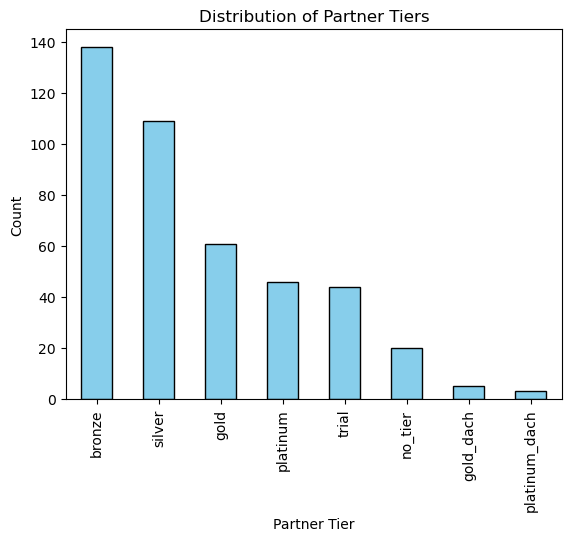

time: 143 ms (started: 2023-11-26 16:21:56 +01:00)


In [40]:
Partners_2['partner_tier'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Partner Tier')
plt.ylabel('Count')
plt.title('Distribution of Partner Tiers')

Text(0.5, 1.0, 'Distribution of Partner Countries')

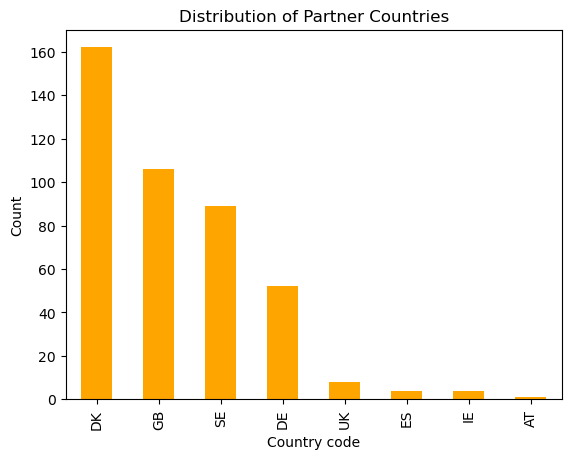

time: 92.7 ms (started: 2023-11-26 16:21:56 +01:00)


In [41]:

partners_tier_counts = Partners_2['address_country_code'].value_counts().plot(kind='bar', color = 'orange')

# Adding labels and title
plt.xlabel('Country code')
plt.ylabel('Count')
plt.title('Distribution of Partner Countries')

(0.0, 10000.0)

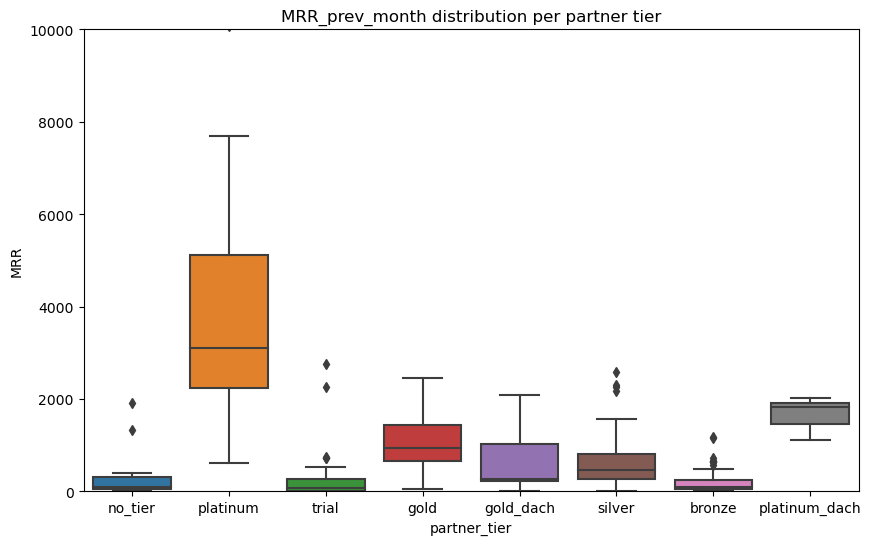

time: 184 ms (started: 2023-11-26 16:21:56 +01:00)


In [42]:
plt.figure(figsize=(10,6)) 
sns.boxplot(data=Partners_2, y="mrr_prev_month", x = 'partner_tier')

# Plot formatting
plt.title('MRR_prev_month distribution per partner tier')
plt.ylabel('MRR')
plt.ylim(0,10000)

Text(0, 0.5, 'MRR')

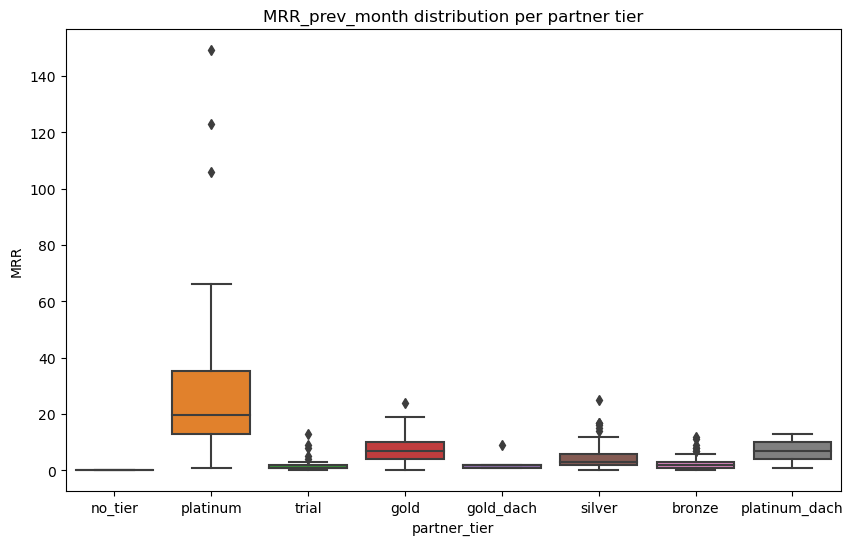

time: 139 ms (started: 2023-11-26 16:21:56 +01:00)


In [43]:
plt.figure(figsize=(10,6)) 
sns.boxplot(data=Partners_2, y="number_of_employees_invited", x = 'partner_tier')

# Plot formatting
plt.title('MRR_prev_month distribution per partner tier')
plt.ylabel('MRR')


In [45]:
Partners_2.sort_values(by = ['days_to_not_new_partner'], ascending = False)


,partner_id,partner_name,partner_tier,is_overridden,entered_current_tier_at,partner_created_at,partner_deleted_at,address_country_code,is_self_sign_up,partner_own_company_id,number_of_employees_invited,days_to_not_new_partner,is_new_partner,mrr_prev_month,mrr_ttm,billed_users_prev_month,billed_users_ttm,pct_physical_cards_enabled,pct_bills_enabled,pct_mileage_enabled,partners_with_clients
112,4679583695548327e95a53fb8534b693,kab_aps,trial,False,5/9/2023 5:43:22,5/9/2023,NaN,DK,False,NaN,1,171.0,True,156.4,1866.0,10.0,128.0,90,0,0,No
397,81ac454ded63154ba723bb7acf4672d9,NaN,trial,False,5/25/2023 16:24:54,5/25/2023,NaN,DK,False,ef6e135ab81c612e8bbb99332c91b0ed,2,155.0,True,724.5,6368.0,50.0,493.0,56,0,0,Yes
327,7d389ce52e415ebcc56374018e373fa1,_legal_con,trial,False,5/25/2023 12:45:19,5/25/2023,NaN,GB,False,NaN,1,155.0,True,146.4,1432.5,23.0,214.0,42,100,0,No
392,31968ee4e29fbdafb46ef935c9877d90,NaN,trial,False,6/1/2023 11:08:46,6/1/2023,NaN,DK,False,89b6ea64987626414575000eb217acc4,3,148.0,True,714.3,7230.5,53.0,508.0,80,0,14,Yes
372,87277f5865dba10a708807bbb1add9b1,ting_ab,trial,False,6/5/2023 12:53:25,6/5/2023,NaN,SE,False,NaN,3,144.0,True,2760.0,23074.3,196.0,1751.0,16,0,10,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,7de966a90fa96c8f8a511a1176996cab,t,platinum,False,3/1/2023 11:20:16,4/16/2020,NaN,DK,False,NaN,21,NaN,False,10069.0,87351.3,504.0,5372.0,20,14,12,Yes
422,39faff68808766fa66d7fc5a558bec63,NaN,gold,True,5/3/2023 15:26:08,7/10/2020,NaN,DK,False,5dcf084eb06cad50c549c05f84da6126,9,NaN,False,275.9,4513.8,94.0,1053.0,76,0,2,Yes
423,0d1bc0999a10f78059054d48edf41369,maet_gutfe,gold,False,3/1/2023 11:20:27,11/25/2020,NaN,DK,False,47a001eb8023bd0084a8a917043e6d66,9,NaN,False,1786.4,16244.1,195.0,1828.0,81,0,0,Yes
424,576dc064a3807820ec06f03a4b9c80fd,lting_aps,gold,False,3/1/2023 11:20:15,3/20/2020,NaN,DK,False,05780967a48a8d31ee8000887f9f16af,19,NaN,False,2464.5,23312.6,181.0,1994.0,77,0,0,Yes


time: 15.3 ms (started: 2023-11-26 16:21:57 +01:00)


In [46]:
pd.to_datetime(Partners_2.sort_values(by = ['days_to_not_new_partner'], ascending = False)['partner_created_at']) \
+ pd.to_timedelta(Partners_2.sort_values(by = ['days_to_not_new_partner'], ascending = False)['days_to_not_new_partner'], unit = 'D')



/Users/erman.sugecmez/opt/miniconda3/lib/python3.9/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/Users/erman.sugecmez/opt/miniconda3/lib/python3.9/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")


112   2023-10-27
397   2023-10-27
327   2023-10-27
392   2023-10-27
372   2023-10-27
         ...    
421          NaT
422          NaT
423          NaT
424          NaT
425          NaT
Length: 426, dtype: datetime64[ns]

time: 9.22 ms (started: 2023-11-26 16:21:57 +01:00)


In [47]:
(pd.to_datetime('2023-10-27') - pd.to_datetime(Partners_2[Partners_2['days_to_not_new_partner'].isna()]['partner_created_at'])).min()


Timedelta('190 days 00:00:00')

time: 6.43 ms (started: 2023-11-26 16:21:57 +01:00)


#### partner's new partner status ends somewhere between 171 and 190 days.

#### It's possible that it's been set to 180 days.

In [49]:
Partners_2[['partner_id', 'partner_tier']]

,partner_id,partner_tier
0,35ec151747be25558a8b13ca634d53bb,no_tier
1,b5391a0c3c67add1b50582a174cf11f8,platinum
2,1191dbbdc78bad18322ce29f77c9f098,no_tier
3,936fc1bea560ac0c12dfcba5eebcf53f,no_tier
4,178cf5a04140022c653c17059869b5f4,trial
...,...,...
421,7de966a90fa96c8f8a511a1176996cab,platinum
422,39faff68808766fa66d7fc5a558bec63,gold
423,0d1bc0999a10f78059054d48edf41369,gold
424,576dc064a3807820ec06f03a4b9c80fd,gold


time: 4.77 ms (started: 2023-11-26 16:21:57 +01:00)


In [50]:
##bring partner tier to clients table
Partner_Clients_3 = pd.merge(Partner_Clients_3, Partners_2[['partner_id', 'partner_tier']], how = 'left', on = 'partner_id')
Partner_Clients_3


,company_id,partner_id,pricing_plan,company_name,is_partner_client,is_partner_own_company,company_country,has_direct_accounting_integration,created_at,deleted_at,is_self_onboarder,reffering_partner_employee_id,mrr_prev_month,user_count,first_presentment_date,last_presentment_date,accounting_system_set_up,accounting_setup_at,first_cardorder_at,first_walletload_date,first_walletload_eur,first_receipt_uploaded_at,first_pocket_expense_at,latest_export_date,last_admin_login_at,first_reimbursement_at,n_physical_cards_enabled,n_virtual_cards_enabled,n_atm_exp,n_in_store_exp,n_online_exp,n_out_of_pocket_expenses,n_empowered_employees,has_pocket_enabled,has_repay_enabled,has_auto_topup_enabled,has_reimbursement_enabled,has_bills_enabled,receipt_percentage_all_time,receipt_percentage_last_30_days,count_of_expenses_all_time,total_number_of_employees,partner_tier
0,d1c71fc1c6c2b34760b496cad8de672f,NaN,PARTNERSHIP,d,True,False,GB,False,1/21/2020 13:09:54,NaN,False,NaN,24.7,7,2/18/2020,10/26/2023,True,1/27/2020 15:36:29,1/31/2020 7:52:50,1/31/2020,2375.0,2/17/2020 15:01:14,NaN,10/5/2023,10/27/2023 7:41:38,NaN,0.0,7.0,0.0,89.0,1002.0,0.0,7.0,False,False,False,False,True,99.13%,81.48%,1145.0,2-4,NaN
1,99e09fee32404327bba5cf3bd1b5ef86,2fdafc68734f3a93c35267c41b90d00c,ADVANCED,ervice_gmb,True,False,DE,True,6/7/2023 9:42:51,NaN,True,NaN,1326.6,112,8/13/2023,10/27/2023,True,7/18/2023 11:27:55,7/27/2023 4:28:50,7/28/2023,1350.0,8/4/2023 15:39:54,8/4/2023 15:39:49,10/24/2023,10/27/2023 8:11:33,8/8/2023,96.0,94.0,0.0,859.0,58.0,82.0,100.0,True,True,False,True,False,93.96%,95.36%,1093.0,100-199,gold_dach
2,21faf2cb874804aa964f03bbc304ab81,d90d2f1becec943598b489bb35045cd8,ESSENTIAL,od_lab_aps,True,False,DK,True,9/13/2023 11:43:00,NaN,True,NaN,0.0,2,9/16/2023,10/25/2023,True,10/10/2023 22:34:59,10/10/2023 22:34:23,9/14/2023,670.0,9/15/2023 10:47:59,NaN,NaN,10/13/2023 8:29:42,NaN,1.0,1.0,0.0,59.0,30.0,0.0,1.0,True,False,False,False,False,12.22%,1.41%,90.0,1,platinum
3,4e3f320ee10c195d9f9ca18cc9bfd410,1213b7afb97428a79662d0dd795bdd6c,STARTER,g_aps,True,False,DK,True,9/6/2023 14:42:30,NaN,False,d03022b3-ab59-563f-abda-d3b244c77d9b,0.0,1,9/30/2023,10/25/2023,True,9/7/2023 13:25:03,NaN,9/26/2023,3351.0,9/29/2023 15:01:43,NaN,10/27/2023,10/11/2023 15:15:39,NaN,0.0,1.0,0.0,5.0,0.0,0.0,1.0,False,False,False,False,False,100.0%,100.0%,5.0,1,platinum
4,915216ec45816fa7bb46c596f5d75b75,05fb1fd092b67ed483a18c84e227918d,STARTER,dlab_aps,True,False,DK,True,5/31/2023 12:47:38,NaN,False,783e6e9c-1e34-5237-b234-1849118dc38a,0.0,2,6/16/2023,10/26/2023,True,5/31/2023 12:58:28,6/5/2023 14:28:07,6/7/2023,134.0,7/8/2023 11:54:58,NaN,10/16/2023,10/11/2023 5:04:05,NaN,0.0,2.0,0.0,13.0,52.0,0.0,2.0,False,False,True,False,False,87.88%,83.33%,66.0,2-4,gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174,4306056146f73e6e2e9a70e9f1da34ae,NaN,ESSENTIAL,tive_studi,True,False,DK,True,7/19/2018 7:48:33,NaN,False,NaN,63.9,6,7/29/2019,10/27/2023,True,8/13/2018 10:16:28,7/26/2018 10:52:20,7/31/2018,671.0,7/30/2019 14:42:46,NaN,9/26/2023,10/27/2023 11:14:05,NaN,6.0,2.0,4.0,2087.0,1909.0,0.0,6.0,False,False,True,False,False,85.84%,76.58%,4173.0,2-4,NaN
1175,e1379c82820415264b7cc98541b4886b,NaN,ESSENTIAL,ergade_aps,True,False,DK,False,1/22/2019 17:37:34,NaN,False,NaN,47.0,4,2/14/2019,10/23/2023,True,NaN,2/1/2019 8:56:58,2/4/2019,670.0,2/12/2019 21:36:00,NaN,9/14/2022,9/26/2023 12:02:19,NaN,3.0,4.0,0.0,779.0,1712.0,0.0,4.0,False,False,True,False,False,99.69%,85.71%,2617.0,10-49,NaN
1176,7363009c492ca5f7595059355dd113b4,cf3c0d5af3755c824c21a70a8e5ac6ca,ESSENTIAL,e_aps,True,False,DK,True,6/8/2023 9:20:18,NaN,True,NaN,53.7,3,8/2/2023,10/26/2023,True,7/5/2023 8:17:08,6/8/2023 10:46:31,7/5/2023,4027.0,7/26/2023 11:08:08,NaN,10/17/2023,10/10/2023 12:05:44,NaN,2.0,2.0,0.0,17.0,73.0,0.0,2.0,True,False,False,False,False,92.93%,85.37%,99.0,2-4,bronze
1177,e8fa2a3c67fc3696

time: 27.9 ms (started: 2023-11-26 16:21:57 +01:00)


### Partner Clients exploration

In [51]:
## how many clients each partner has (as previously assumed: only exclusive partners)
partner_clients = Partner_Clients_3.groupby(['partner_id', 'partner_tier'])\
.agg({'company_id': 'count',
    'mrr_prev_month': sum,
    'user_count': sum,
     }).reset_index().sort_values(by = 'company_id', ascending = False)
    

partner_clients


,partner_id,partner_tier,company_id,mrr_prev_month,user_count
53,316eb2b07248d3c2eb92d9010db2b74d,platinum,30,9.4,54
173,9329259cdc8d609b07677a9c0d5044c7,platinum,20,859.6,39
201,a8fa875ce4385e7e48f04ea742aeca5e,platinum,19,37.8,45
43,290886da2fc98ba8430ebaa0e5d1ec20,silver,16,0.0,14
266,f5ffa7478dc9e6f57246611fa4940f88,platinum,15,223.2,36
...,...,...,...,...,...
151,7de966a90fa96c8f8a511a1176996cab,platinum,1,37.6,2
152,7e8bb9d37a2d7c30ab9c01249432ca4e,silver,1,99.0,6
153,7edd87f4405e6fe7e790a49a3e492dbd,silver,1,0.0,1
154,7f521d44d4e3005c6dc61a93a81ff899,trial,1,69.1,4


time: 12.3 ms (started: 2023-11-26 16:21:57 +01:00)


In [72]:
###convert platinum_dach's, gold_dach's into platinum and gold
partner_clients['partner_tier'] = partner_clients['partner_tier'].replace('platinum_dach', 'platinum')
partner_clients['partner_tier'] = partner_clients['partner_tier'].replace('gold_dach', 'gold')
partner_clients['partner_tier'] = partner_clients['partner_tier'].replace('gold_partner_tier', 'gold')

time: 6.29 ms (started: 2023-11-26 16:46:55 +01:00)


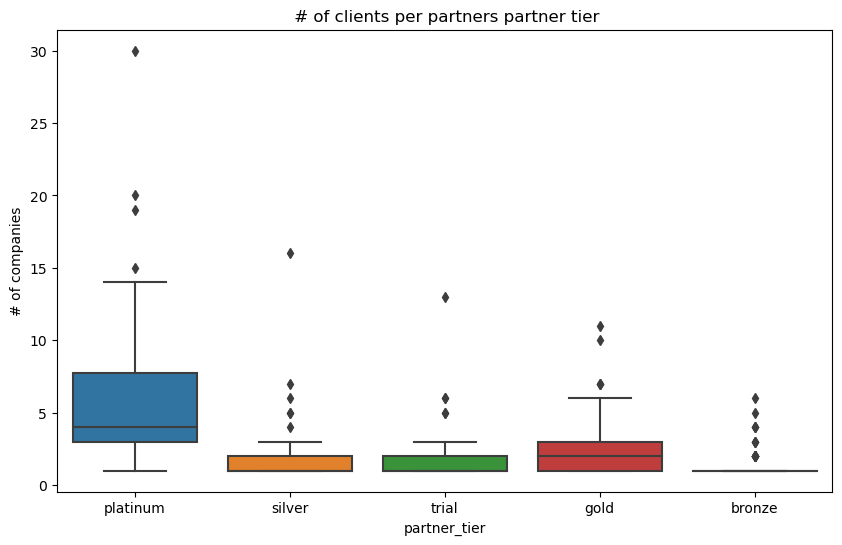

Text(0.5, 1.0, 'Avg client count per partner for each partner tier')

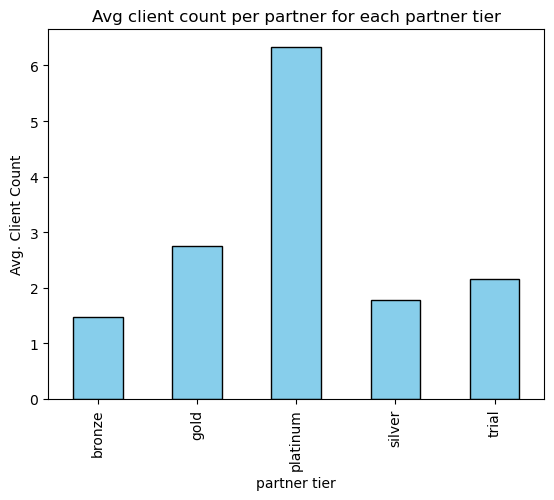

time: 303 ms (started: 2023-11-26 16:54:25 +01:00)


In [77]:
plt.figure(figsize=(10,6)) 
sns.boxplot(data=partner_clients, y="company_id", x = 'partner_tier')

# Plot formatting
plt.title(' # of clients per partners partner tier')
plt.ylabel('# of companies')
plt.show()

ax = partner_clients.groupby('partner_tier')['company_id'].mean().plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('partner tier')
plt.ylabel('Avg. Client Count')
plt.title('Avg client count per partner for each partner tier')


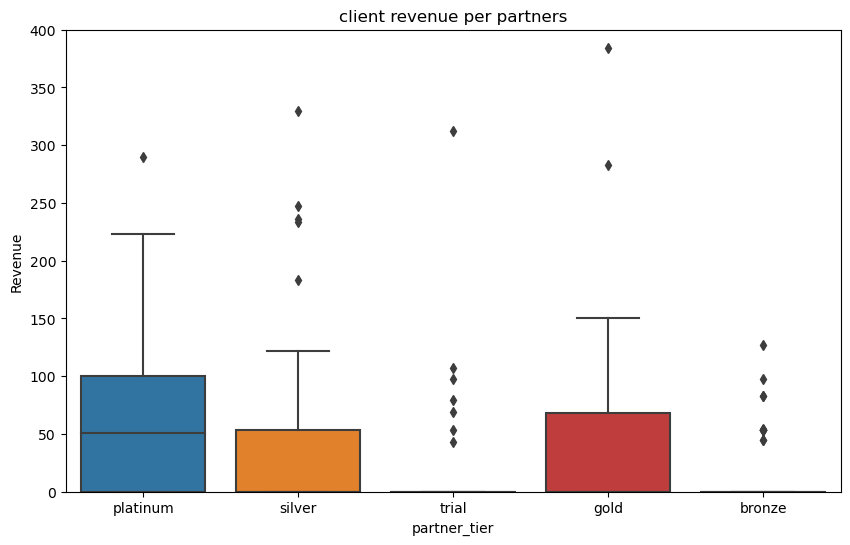

Text(0.5, 1.0, 'Avg client revenue per partners')

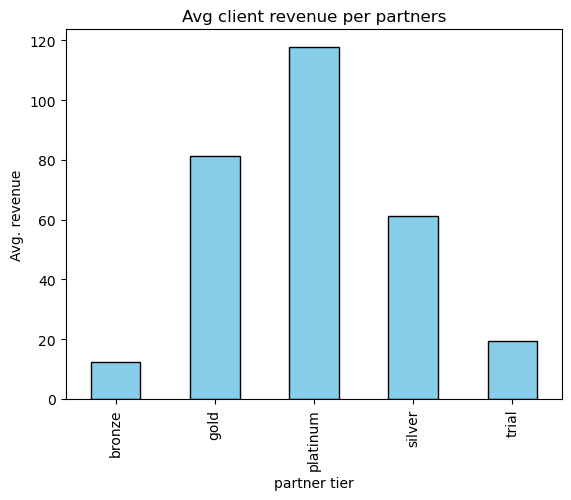

time: 197 ms (started: 2023-11-26 16:57:42 +01:00)


In [82]:
plt.figure(figsize=(10,6)) 
sns.boxplot(data=partner_clients, y="mrr_prev_month", x = 'partner_tier')

# Plot formatting
plt.title('client revenue per partners')
plt.ylabel('Revenue')
plt.ylim(0,400)
plt.show()

ax = partner_clients.groupby('partner_tier')['mrr_prev_month'].mean().plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('partner tier')
plt.ylabel('Avg. revenue')
plt.title('Avg client revenue per partners')


#### While platinum partners are the most revenue generated partners, the clients they have does not need to be the biggest



#### Finding: Partner tier seems like a direct result of partner's recurring revenue and # of clients they have

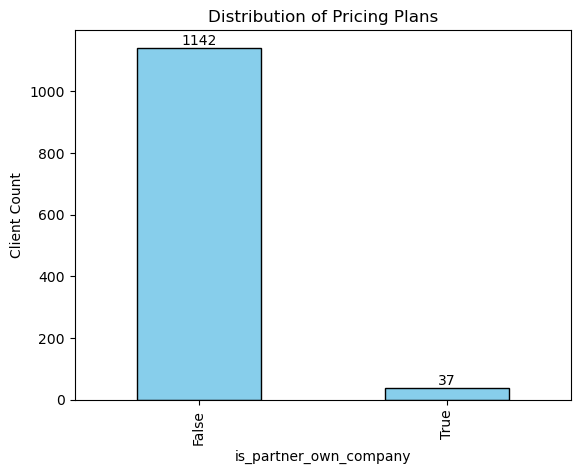

time: 74 ms (started: 2023-11-26 16:21:57 +01:00)


In [54]:
partner_own_company_counts = Partner_Clients_3['is_partner_own_company'].value_counts()

ax = partner_own_company_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('is_partner_own_company')
plt.ylabel('Client Count')
plt.title('Distribution of Pricing Plans')

# Adding values on top of the bars
for i, value in enumerate(partner_own_company_counts):
    ax.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

## Question #2

     #### sql module resulting a final table has been created using following assumptions:

### Revenue sharing assumptions

- Clients who are referred by clients will be revenue shared. 'referring_partner_employee_id' is not null in PartnerClients table
- If a client is partner_own_country, then revenue will not be shared. 'is_partner_own_company' = False on Partner Clients table
- the revenue sharing % might be increased as partners bring more clients. I see partner tier is positively correlated with that. from Bronze to Platinum, the revenue sharing % will be increased. Since the partner tier might change over time, I'll take 'month_partner_tier' in MRR revenue as the partner's tier in the respective month.
-  I'll apply the following revenue share % for each partner tier
      ('TRIAL', 0),
      ('BRONZE', 0),
      ('SILVER', 0.10),
      ('GOLD', 0.15),
      ('PLATINUM', 0.20)
- clients who have been exclusively assigned to only 1 partner will be revenue shared. Multiple partner clients may also have been revenue shared by splitting the overall revenue to each assigned partner, but I won't work on that for now